<a href="https://colab.research.google.com/github/mike-jansen/misinformation-analysis-capstone/blob/main/misinformation_decision_tree_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
import pandas as pd
import numpy as np

Mounted at /content/drive/


# Preprocessing

In [2]:
# loading data
path = '/content/drive/MyDrive/output/'
liar_false = pd.read_csv(path + 'liar_false.csv')
liar_true = pd.read_csv(path + 'liar_true.csv')
nela_false = pd.read_csv(path + 'nela_false.csv')
nela_true = pd.read_csv(path + 'nela_true.csv')

In [3]:
nela_true.rename(columns={'content': 'text'}, inplace=True)
nela_true.drop('title', axis=1, inplace=True)
nela_true.insert(1, 'label', True)

nela_false.rename(columns={'content': 'text'}, inplace=True)
nela_false.drop('title', axis=1, inplace=True)
nela_false.insert(1, 'label', False)

In [4]:
#df_combined = pd.concat([liar_true, liar_false, nela_true, nela_false])

nela_combined = pd.concat([nela_true, nela_false])
liar_combined = pd.concat([liar_true, liar_false])

# NELA Training

In [5]:
# define features and target
X_nela = nela_combined[['Analytic', 'Authentic', 'BigWords', 'ppron']]  # update this to include new features
y_nela = nela_combined['label']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# split the data
X_train_nela, X_test_nela, y_train_nela, y_test_nela = train_test_split(X_nela, y_nela, test_size=0.2, random_state=42)

# create a decision tree
clf = DecisionTreeClassifier(max_depth=10)

# train the decision tree
clf.fit(X_train_nela, y_train_nela)

# make a prediction
y_pred_nela = clf.predict(X_test_nela)

In [7]:
from sklearn.metrics import accuracy_score

accuracy_nela = accuracy_score(y_test_nela, y_pred_nela)
print(f"Accuracy: {accuracy_nela}")

Accuracy: 0.57175


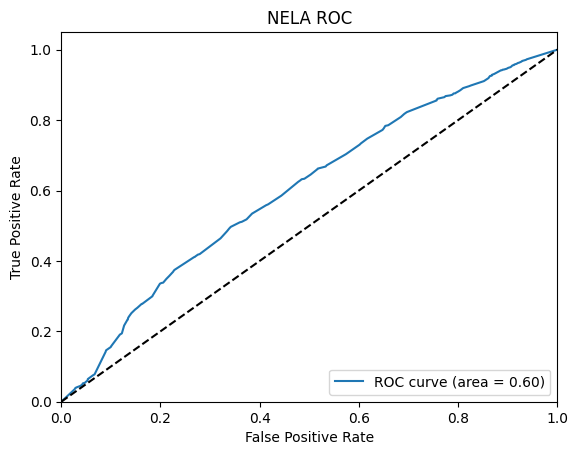

In [8]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_prob_nela = clf.predict_proba(X_test_nela)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_nela, y_pred_prob_nela)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NELA ROC')
plt.legend(loc="lower right")
plt.show()


# LIAR Training

In [9]:
# define features and target
X_liar = liar_combined[['Analytic', 'Authentic', 'BigWords', 'ppron']]
y_liar = liar_combined['label']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# split the data
X_train_liar, X_test_liar, y_train_liar, y_test_liar = train_test_split(X_liar, y_liar, test_size=0.2, random_state=42)

# create a decision tree
clf = DecisionTreeClassifier(max_depth=10)

# train the decision tree
clf.fit(X_train_liar, y_train_liar)

# make a prediction
y_pred_liar = clf.predict(X_test_liar)

In [11]:
from sklearn.metrics import accuracy_score

accuracy_liar = accuracy_score(y_test_liar, y_pred_liar)
print(f"Accuracy: {accuracy_liar}")

Accuracy: 1.0


In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_prob_liar = clf.predict_proba(X_test_liar)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_liar, y_pred_prob_liar)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LIAR ROC')
plt.legend(loc="lower right")
plt.show()


IndexError: ignored